In [111]:
import sys
import os

sys.path.append(os.path.dirname(os.getcwd()))

import pandas as pd
from learn.utils import FileHandler, get_file_suffix_map

In [112]:
df = pd.read_csv('../learning_out/intersection_0/action_hist.csv')

In [113]:
df

,timestamp,prev_state,prev_action,curr_state,curr_action,avg_lane_queueing_length,avg_lane_queueing_time,prev_avg_lane_queueing_length,prev_avg_lane_queueing_time,reward
0,1666335268,NaN,NaN,0,K,100.000000,100.000000,101.000000,101.000000,2
1,1666335272,0.0,K,0,I,252.673685,66.950415,100.000000,100.000000,1
2,1666335276,0.0,I,1,K,256.167312,65.017980,252.673685,252.673685,1
3,1666335279,1.0,K,1,K,231.815009,61.144274,256.167312,256.167312,2
4,1666335282,1.0,K,1,I,227.636789,53.929559,231.815009,231.815009,2
...,...,...,...,...,...,...,...,...,...,...
1995,1666340860,3.0,D,2,D,75.987577,45.393124,91.685708,91.685708,2
1996,1666340862,2.0,D,1,D,125.247033,47.050881,75.987577,75.987577,1
1997,1666340865,1.0,D,0,K,151.132847,52.377700,125.247033,125.247033,1
1998,1666340868,0.0,K,0,K,140.731592,47.683701,151.132847,151.132847,2


In [114]:
target = df[1:][['avg_lane_queueing_length', 'avg_lane_queueing_time']]

In [118]:
target['roll_lane_length'] = target['avg_lane_queueing_length'].rolling(500).mean()
target['roll_waiting_time'] = target['avg_lane_queueing_time'].rolling(500).mean()

<AxesSubplot: >

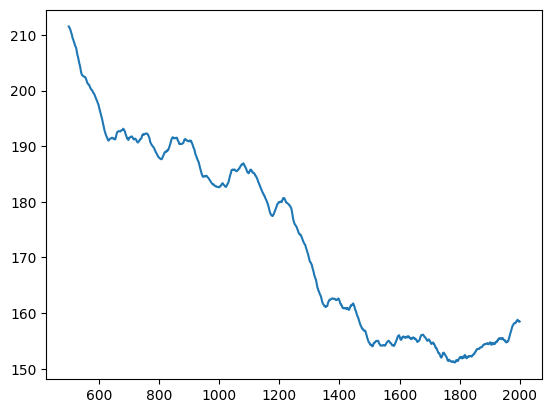

In [119]:
target['roll_lane_length'].plot()

<AxesSubplot: >

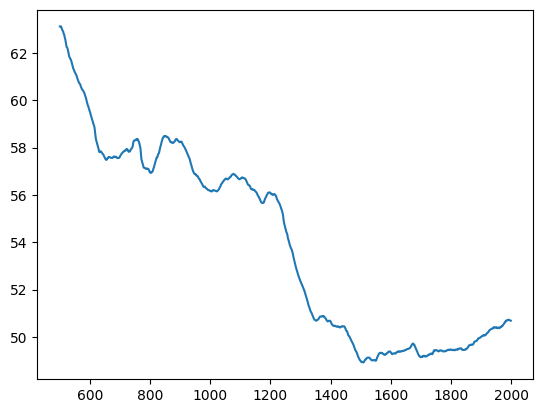

In [120]:
target['roll_waiting_time'].plot()

This approach is not robust and stable becase each choice of the idividual light might affect each other